![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


 # **Cortex Game: Round2--Conditional Amount**

Please note that you need to run this notebook 'Round2--Conditional Amount' first, before running the notebook 'Round2--Probability of Giving'.   

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [2]:
my_folder = "/content/drive/MyDrive/S7/HEC"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/S7/HEC


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [3]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 9.1 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=99eb30aa28bbc128af1232a5f9c6d37dac4c9bfeb5a76271c5dd6755250c3a57
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [4]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/S7/HEC/sascfg_personal.py")
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo

Please enter the OMR user id: A01570318@tec.mx
Please enter the password for OMR user : ··········
SAS Connection established. Subprocess id is 338



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/S7/HEC/sascfg_personal.py
WORK Path             = /saswork/SAS_work0C6A0000EB1D_odaws01-usw2-2.oda.sas.com/SAS_work200D0000EB1D_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 60189


In [5]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo



RuntimeError: ignored

***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [6]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 04:43:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 04:43:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

> For reference: 

> 1- [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2- [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [7]:
import pandas as pd

#comment: Transform cloud sas dataset to python dataframe(pandas) ==> might take some time.

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [8]:
#Step1 Merge the Data
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge = data_merge.loc[(data_merge['GaveThisYear'] ==1)]
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
212415,2212416.0,JOHNSON,MARGARET,1.0,27.0,35500.0,High School,City,8.0,2.0,...,4.0,7.0,80.0,10.0,30.0,0.0,0.0,0.0,1.0,25.0
878261,2878262.0,HAMOR,CRISTAL,1.0,40.0,11900.0,High School,City,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,10.0


## Treating Missing Values

>Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [9]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=data_merge['GaveLastYear'].median())
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=(data_merge['GaveLastYear'].median()))

data_merge.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
956309,2956310.0,DORMAN,ANTWAN,0.0,40.0,75600.0,University / College,Suburban,6.0,1.0,...,3.0,5.0,140.0,25.0,75.0,0.0,0.0,0.0,1.0,20.0
885217,2885218.0,MARTIN,ELISABETH,1.0,18.0,12200.0,University / College,Suburban,5.0,1.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0
534642,2534643.0,KNOBLOCH,PAULINE,1.0,69.0,10400.0,High School,Rural,7.0,3.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0
274648,2274649.0,GONZALEZ,JOSEPHINE,1.0,69.0,14100.0,High School,City,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0
465876,2465877.0,LENZ,LEE,0.0,49.0,248300.0,University / College,Suburban,9.0,3.0,...,2.0,9.0,40.0,20.0,20.0,0.0,0.0,0.0,1.0,10.0


## Data Partition

In [10]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.3,random_state=5678) # you can change the percentage
train.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
915634,2915635.0,SHEARER,DANIEL,0.0,21.0,7900.0,University / College,Downtown,2.0,1.0,...,NaN,NaN,0.0,0.0,0.0,1.0,20.0,1.0,1.0,30.0
333716,2333717.0,RAMIREZ,ELVIRA,1.0,25.0,44600.0,University / College,Suburban,6.0,0.0,...,1.0,5.0,10.0,10.0,10.0,1.0,40.0,1.0,1.0,500.0
831576,2831577.0,WAITE,BENJAMIN,0.0,33.0,248100.0,University / College,Rural,8.0,4.0,...,3.0,8.0,90.0,20.0,50.0,0.0,0.0,0.0,1.0,40.0
801590,2801591.0,LITTLE,KEVIN,0.0,82.0,3600.0,High School,Downtown,8.0,3.0,...,4.0,8.0,85.0,10.0,30.0,0.0,0.0,0.0,1.0,100.0
859857,2859858.0,OCHOA,MARY,1.0,74.0,46900.0,High School,Rural,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0



## Prebuilt Models

***
### Linear Regression Model


> The [sk-learn library]( https://scikit-learn.org/stable/index.html) offers more advanced models. 

In [ ]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)

regr_predict=regr.predict(X_valid)

print(regr_predict)

[ 51.16213414  13.54362045 120.78262404 ...  37.6595094   68.71680603
  60.2614866 ]


In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

NameError: ignored

## Regression Tree Model（Py）

In [ ]:
from sklearn.tree import DecisionTreeRegressor
columns = ['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities', 'TotalGift', 'MaxGift']

X_train = train[columns] 
Y_train = train['AmtThisYear']
X_valid = validation[columns] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=4, random_state=0).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
print(DT_predict)

[ 51.88865666  30.23313158 169.85860826 ...  53.57906847  48.42181748
  68.75937647]


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

63.18951052949899
53968.353579257775
232.31089853740778


In [17]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import numpy as np
columns = ['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities', 'MaxGift']

X_train = train[columns] 
Y_train = train['AmtThisYear']
X_valid = validation[columns] 
Y_valid = validation['AmtThisYear']

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train, Y_train)

y_pred = xgb_model.predict(X_valid)

mse=mean_squared_error(Y_valid, y_pred)

print(np.sqrt(mse))

[16:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
238.65238946053555


In [18]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_pred,Y_valid))

-21.854191675553313


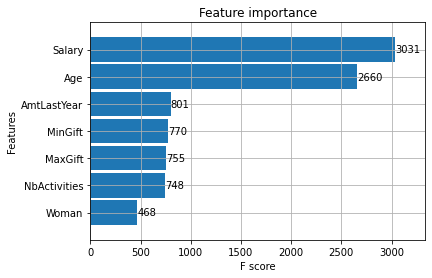

In [19]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(xgb_model, height=0.9)

### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html


## Scoring New Data

### Prepare data for scoring

In [21]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the linear regression model performed better than the regression tree based on the MSE criteria.

### Predict 'amount given' for members who were contacted

In [ ]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 
scoring_data_contact[['MaxGift']] = scoring_data_contact[['MaxGift']].fillna(value=scoring_data_contact['GaveLastYear'].median())
scoring_data_contact[['TotalGift']] = scoring_data_contact[['TotalGift']].fillna(value=scoring_data_contact['GaveLastYear'].median())
#scoring_data_contact.head()

X = scoring_data_contact[columns] 

regr_predict_contact=DT_model.predict(X)

scoring_data_contact['Prediction'] = regr_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 
scoring_data_contact.head()

,ID,AmtContact
0,2000001.0,67.524324
1,2000002.0,73.355996
2,2000003.0,106.435478
3,2000004.0,42.831628
4,2000005.0,106.435478


In [22]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 
scoring_data_contact[['MaxGift']] = scoring_data_contact[['MaxGift']].fillna(value=scoring_data_contact['GaveLastYear'].median())
scoring_data_contact[['TotalGift']] = scoring_data_contact[['TotalGift']].fillna(value=scoring_data_contact['GaveLastYear'].median())
#scoring_data_contact.head()

X = scoring_data_contact[columns] 

regr_predict_contact=xgb_model.predict(X)

scoring_data_contact['Prediction'] = regr_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 
scoring_data_contact.head()

,ID,AmtContact
0,2000001.0,29.526424
1,2000002.0,57.095085
2,2000003.0,92.695808
3,2000004.0,42.307663
4,2000005.0,96.618202


### Predict 'amount given' for members who were not contacted

In [23]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)
scoring_data_nocontact[['MaxGift']] = scoring_data_nocontact[['MaxGift']].fillna(value=scoring_data_nocontact['GaveLastYear'].median())
scoring_data_nocontact[['TotalGift']] = scoring_data_nocontact[['TotalGift']].fillna(value=scoring_data_nocontact['GaveLastYear'].median())
#scoring_data_nocontact.head()

X = scoring_data_nocontact[columns] 

regr_predict_nocontact=xgb_model.predict(X)

scoring_data_nocontact['Prediction'] = regr_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction': 'AmtNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,AmtNoContact
0,2000001.0,29.526424
1,2000002.0,57.095085
2,2000003.0,92.695808
3,2000004.0,42.307663
4,2000005.0,96.618202


In [24]:
result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Amt.sort_values(by=['ID'], inplace=True)
result_Amt.head(3)

,ID,AmtContact,AmtNoContact
0,2000001.0,29.526424,29.526424
1,2000002.0,57.095085,57.095085
2,2000003.0,92.695808,92.695808


## Exporting Results to a CSV File

In [25]:
result_Amt.to_csv('Round2_Output_amt.csv', index=False)

In [ ]:
# Reminder: You are now done with step 1 of Round 2 on predicting the conditional amount.
# Next, to complete Round2, you need to perform step 2 to predict the probability of giving, calculate the uplift and prepare your decision.

In [26]:
!head Round2_Output_amt.csv

ID,AmtContact,AmtNoContact
2000001.0,29.526424,29.526424
2000002.0,57.095085,57.095085
2000003.0,92.69581,92.69581
2000004.0,42.307663,42.307663
2000005.0,96.6182,96.6182
2000006.0,39.554234,39.554234
2000007.0,29.307238,29.307238
2000008.0,53.718277,53.718277
2000009.0,40.601345,40.601345
